In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path= "drive/MyDrive/ColabNotebooks/AI_Class/projects/p5/"


In [3]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

**Read data**

In [4]:
df = pd.read_csv(path+"creditcard.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check Null values**

In [6]:
print (df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**PrePare data for clustring**

In [7]:
df_untouched = df.drop(columns='Class')
labels_untouched = df['Class'].ravel()

**Find the dbest K for kmeans with elbow method**

In [8]:
inertia_values = []
for i in range(1, 5):
    kmeans_clusterer = KMeans(n_clusters = i, init = 'random', random_state = 1)
    kmeans_clusterer.fit(df_untouched)
    inertia_values.append(kmeans_clusterer.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


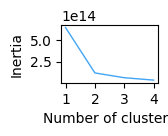

In [9]:
plt.figure(figsize=(1.25,0.75))
plt.plot(
    range(1, 5), inertia_values,
    color = "#42A5F5",
    linewidth = '1'
    )
plt.xticks(range(1,5))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Train and Fit data to kmeans model**

In [10]:
kmeans= KMeans(n_clusters=2 , n_init='auto').fit(df_untouched)

In [11]:
sample_cluster_mask =kmeans.labels_


**Evaluate model**

<Axes: >

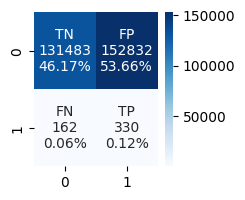

In [12]:
cf_matrix = metrics.cluster.contingency_matrix(labels_true=labels_untouched, labels_pred=sample_cluster_mask)
plt.figure(figsize=(2,2))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels_cf = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels_cf = np.asarray(labels_cf).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels_cf, fmt='', cmap='Blues')

In [13]:
print(f'Clustering purity: {np.sum(np.max(cf_matrix, axis=1)) / np.sum(cf_matrix)}')

Clustering purity: 0.5377747035711903


**prepare data for Classification**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_untouched,labels_untouched, test_size=0.2, random_state=8)
features = X_train.columns
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Search for best SVM hyperparameter**

In [ ]:
poly_param_combinations = {'kernel':['poly'], 'C':[0.1, 1.0, 10], 'gamma':[0.01, 0.1, 1.0, 10.0], 'degree':[3, 4, 5]}
poly_svm_classifier = SVC()

clf_poly = GridSearchCV(estimator=poly_svm_classifier, param_grid=poly_param_combinations, cv=5, scoring='accuracy', n_jobs=-1)
clf_poly.fit(X_train, y_train)
print(clf_poly.best_score_)
print(clf_poly.best_params_)


**Train and Fit data to model**

In [ ]:
opt_clf = SVC(kernel='poly', degree=4)
opt_clf.fit(X_train, y_train)

In [ ]:
y_pred = opt_clf.predict(X_test)

In [ ]:
print(f'Number of negative samples: {Counter(y_pred)[0]}\nNumber of positive samples: {Counter(y_pred)[1]}')

**Evaluate model**

In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
cf_matrix = metrics.cluster.contingency_matrix(labels_true=y_test, labels_pred=y_pred)
plt.figure(figsize=(2,2))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels_cf = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels_cf = np.asarray(labels_cf).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels_cf, fmt='', cmap='Greens')

**Compare models**<br/>
Since our dataset had already been labeled, using supervised learning methods gives better results.<br/>

as the credit card fraud job is an important job we must only use accurate model and model with accuricy high the 90 percent so the classification method is absolutely better the clustring